In [1]:
#NDNN TRY

In [2]:
#======================== IMPORT PACKAGES ===========================

import numpy as np
import matplotlib.pyplot as plt 
from tkinter.filedialog import askopenfilename
import cv2
import matplotlib.image as mpimg
import warnings
warnings.filterwarnings('ignore')
from skimage.feature import greycomatrix, greycoprops

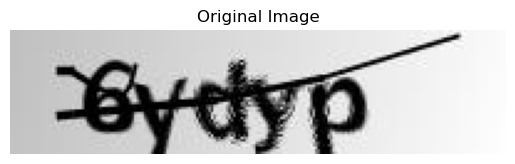

In [3]:
#====================== 1.READ A INPUT IMAGE =========================

filename = askopenfilename()
img = mpimg.imread(filename)
plt.imshow(img)
plt.title('Original Image')
plt.axis ('off')
plt.show()


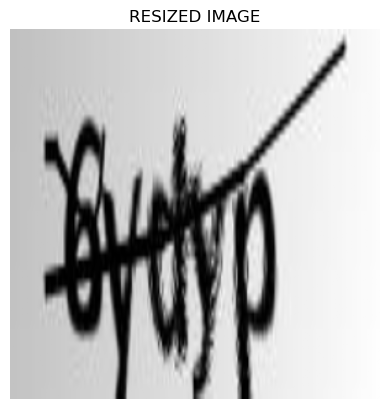

In [4]:
#============================ 2.IMAGE PREPROCESSING ====================

#==== RESIZE IMAGE ====

resized_image = cv2.resize(img,(300,300))
img_resize_orig = cv2.resize(img,((50, 50)))

fig = plt.figure()
plt.title('RESIZED IMAGE')
plt.imshow(resized_image)
plt.axis ('off')
plt.show()

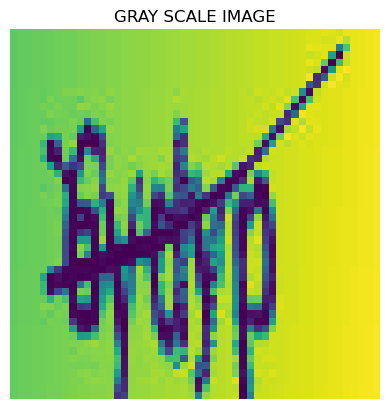

In [5]:
#==== GRAYSCALE IMAGE ====

try:            
    gray11 = cv2.cvtColor(img_resize_orig, cv2.COLOR_BGR2GRAY)
    
except:
    gray11 = img_resize_orig
   
fig = plt.figure()
plt.title('GRAY SCALE IMAGE')
plt.imshow(gray11)
plt.axis ('off')
plt.show()

In [6]:
#============================ 3.FEATURE EXTRACTION ====================

# === MEAN MEDIAN VARIANCE ===

mean_val = np.mean(gray11)
median_val = np.median(gray11)
var_val = np.var(gray11)
Test_features = [mean_val,median_val,var_val]


print()
print("----------------------------------------------")
print("FEATURE EXTRACTION --> MEAN, VARIANCE, MEDIAN ")
print("----------------------------------------------")
print()
print("1. Mean Value     =", mean_val)
print()
print("2. Median Value   =", median_val)
print()
print("3. Variance Value =", var_val)



----------------------------------------------
FEATURE EXTRACTION --> MEAN, VARIANCE, MEDIAN 
----------------------------------------------

1. Mean Value     = 0.71109647

2. Median Value   = 0.827451

3. Variance Value = 0.096409


In [7]:
#============================ 5. IMAGE SPLITTING ===========================

import os 

from sklearn.model_selection import train_test_split

test_data = os.listdir('Dataset/Test/')
tr_data = os.listdir('Dataset/Train/')


dot1= []
labels1 = [] 
for img11 in test_data:
        # print(img)
        img_1 = mpimg.imread('Dataset/Test//' + "/" + img11)
        img_1 = cv2.resize(img_1,((50, 50)))


        try:            
            gray = cv2.cvtColor(img_1, cv2.COLOR_BGR2GRAY)
            
        except:
            gray = img_1

        
        dot1.append(np.array(gray))
        labels1.append(1)


for img11 in tr_data:
        # print(img)
        img_1 = mpimg.imread('Dataset/Train//' + "/" + img11)
        img_1 = cv2.resize(img_1,((50, 50)))


        try:            
            gray = cv2.cvtColor(img_1, cv2.COLOR_BGR2GRAY)
            
        except:
            gray = img_1

        
        dot1.append(np.array(gray))
        labels1.append(2)

x_train, x_test, y_train, y_test = train_test_split(dot1,labels1,test_size = 0.2, random_state = 101)

print()
print("-------------------------------------")
print("       IMAGE SPLITTING               ")
print("-------------------------------------")
print()


print("Total no of data        :",len(dot1))
print("Total no of test data   :",len(x_train))
print("Total no of train data  :",len(x_test))



-------------------------------------
       IMAGE SPLITTING               
-------------------------------------

Total no of data        : 1001
Total no of test data   : 800
Total no of train data  : 201


In [13]:
#=============================== CLASSIFICATION =================================

from keras.utils import to_categorical

y_train1=np.array(y_train)
y_test1=np.array(y_test)

train_Y_one_hot = to_categorical(y_train1)
test_Y_one_hot = to_categorical(y_test1)


x_train2=np.zeros((len(x_train),50,50,50))
for i in range(0,len(x_train)):
        x_train2[i,:,:,:]=x_train2[i]

x_test2=np.zeros((len(x_test),50,50,50))
for i in range(0,len(x_test)):
        x_test2[i,:,:,:]=x_test2[i]


In [20]:
#compile the model 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import  Dense, Flatten,Dropout,Reshape
model = Sequential() 


train_Y_one_hot = to_categorical(y_train1)
test_Y_one_hot = to_categorical(y_test)


# Reshape input data
x_train_reshaped = x_train.reshape(len(x_train1), -1)
x_test_reshaped = x_test.reshape(len(x_test1), -1)

AttributeError: 'list' object has no attribute 'reshape'

In [19]:
from keras.layers import Dense, Dropout, Flatten, Reshape
from keras.models import Sequential

# Define the model
inner_model = Sequential()
inner_model.add(Dense(activation = "relu", input_shape = (16,), units = 8, kernel_initializer = "uniform"))
inner_model.add(Dropout(0.2))
inner_model.add(Dense(activation = "relu", units = 4, kernel_initializer = "uniform"))
inner_model.add(Dense(activation = "sigmoid", units = 1, kernel_initializer = "uniform"))

outer_model = Sequential()
outer_model.add(Dense(activation = "relu", input_dim = 50, units = 16, kernel_initializer = "uniform"))
outer_model.add(Reshape((16,)))
outer_model.add(inner_model)
outer_model.add(Dense(activation = "relu", units = 8,kernel_initializer = "uniform"))
outer_model.add(Dense(activation = "sigmoid", units = 1,kernel_initializer = "uniform"))

model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])
history1 = model.fit(x_train2, train_Y_one_hot, batch_size = 50, epochs = 10, validation_data = (x_test2, test_Y_one_hot), verbose = 1)

loss= history1.history['loss']
loss=max(loss)

acc_dd=history1.history['accuracy']
acc_dd=max(acc_dd)
acc_dd=acc_dd*100

test_loss, test_acc = model.evaluate(x_test_reshaped, test_Y_one_hot)
print(test_loss)
print(test_acc)

Epoch 1/10


ValueError: in user code:

    File "C:\Users\Keerthana.Dinakaran\Anaconda3\lib\site-packages\keras\engine\training.py", line 1284, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\Keerthana.Dinakaran\Anaconda3\lib\site-packages\keras\engine\training.py", line 1268, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\Keerthana.Dinakaran\Anaconda3\lib\site-packages\keras\engine\training.py", line 1249, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\Keerthana.Dinakaran\Anaconda3\lib\site-packages\keras\engine\training.py", line 1051, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "C:\Users\Keerthana.Dinakaran\Anaconda3\lib\site-packages\keras\engine\training.py", line 1109, in compute_loss
        return self.compiled_loss(
    File "C:\Users\Keerthana.Dinakaran\Anaconda3\lib\site-packages\keras\engine\compile_utils.py", line 265, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "C:\Users\Keerthana.Dinakaran\Anaconda3\lib\site-packages\keras\losses.py", line 142, in __call__
        losses = call_fn(y_true, y_pred)
    File "C:\Users\Keerthana.Dinakaran\Anaconda3\lib\site-packages\keras\losses.py", line 268, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "C:\Users\Keerthana.Dinakaran\Anaconda3\lib\site-packages\keras\losses.py", line 1984, in categorical_crossentropy
        return backend.categorical_crossentropy(
    File "C:\Users\Keerthana.Dinakaran\Anaconda3\lib\site-packages\keras\backend.py", line 5559, in categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)

    ValueError: Shapes (50, 3) and (50, 50, 50, 2) are incompatible


In [ ]:
plt.plot(history1.history['loss'])
plt.plot(history1.history['accuracy'])

plt.title(' Validation Graph')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss','acc'], loc = 'upper left')
plt.show()

In [ ]:

print("----------------------------------------------")
print("NESTED DEEP NEURAL NETWORK")
print("----------------------------------------------")
print()


print("1) Accuracy     =",acc_dd ,'%')
print()
print('2) Error rate  = ',loss,'%')
